In [40]:
import pandas as pd
data=pd.read_excel('整合数据.xlsx',sheet_name='Sheet2')
data.fillna(0.04, inplace=True)
data

,氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3)
0,0.04,6.32,0.87,3.93,1.74
1,0.04,2.01,0.04,4.06,0.04
2,0.04,5.87,1.11,5.50,2.16
3,0.04,7.12,1.56,6.44,2.06
4,0.04,7.35,1.77,7.50,2.62
5,0.04,0.04,1.98,11.15,2.39
6,0.04,5.41,1.73,10.05,6.04
7,0.04,1.07,0.04,1.98,0.17
8,0.04,0.62,0.04,1.32,0.32
9,0.04,0.21,0.04,0.81,0.26


In [41]:
dataNew=data #[['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)','w1','w2','w3','w4','w5','Vowel_fre','Consonant_fre','Speech','Same_letter_fre','w1_fre','w2_fre','w3_fre','w4_fre','w5_fre']]

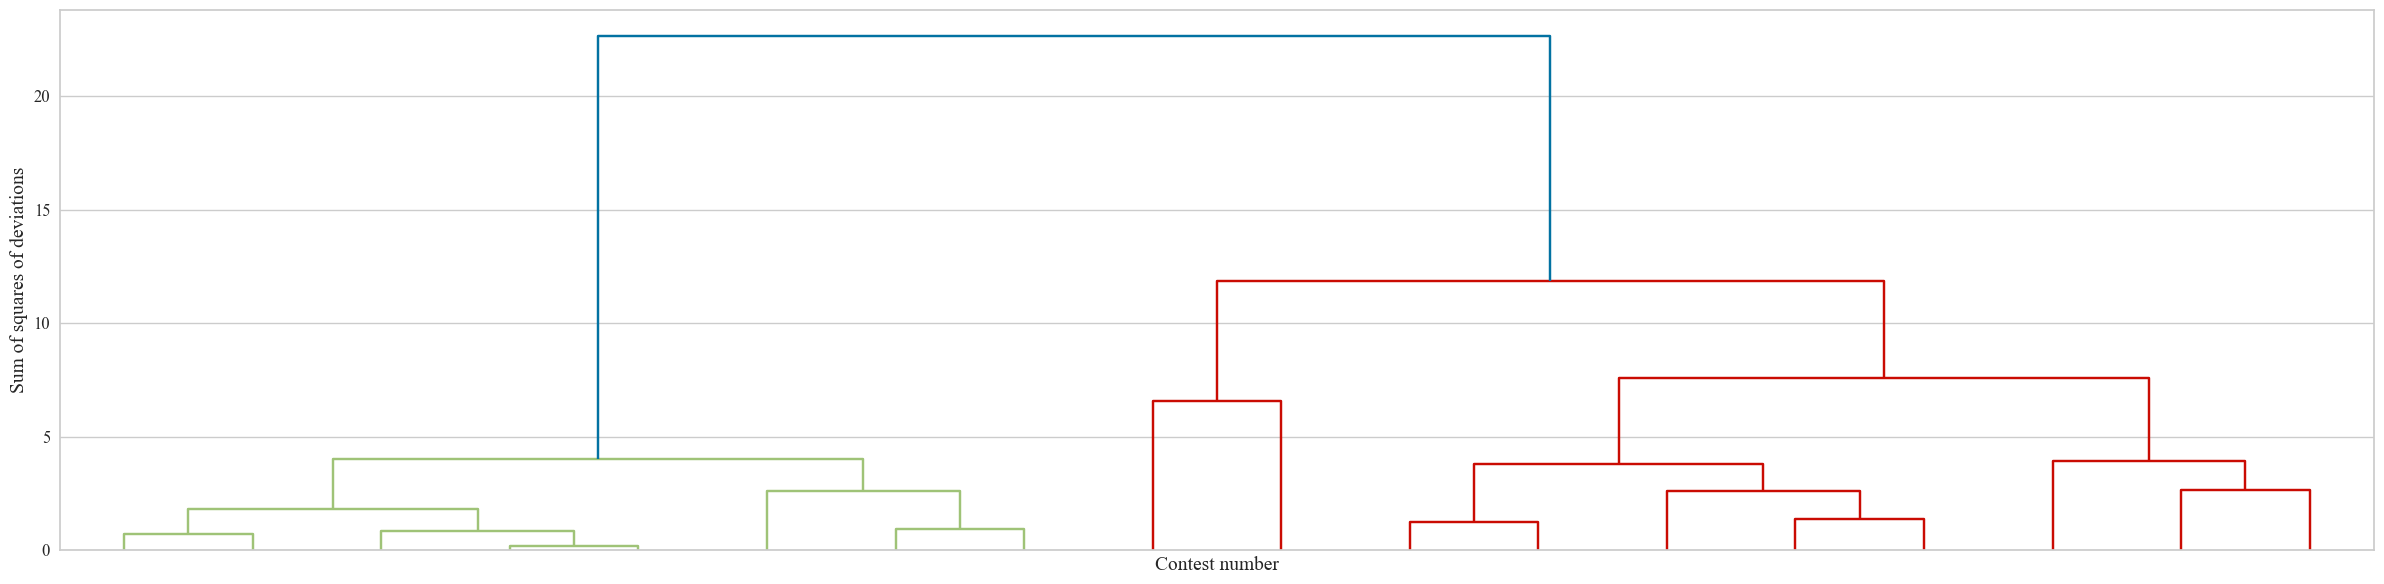

In [42]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))
dendrogram = sch.dendrogram(sch.linkage(dataNew, method = 'ward'))
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.xlabel('Contest number',fontsize=14)
plt.ylabel('Sum of squares of deviations',fontsize=14)
plt.xticks([],font='Times New Roman',fontsize=12)
plt.yticks(font='Times New Roman',fontsize=12)
plt.tight_layout()
plt.savefig("figures\\层次聚类树状图.pdf")

In [43]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer

D:\python\p\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\python\p\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\python\p\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\python\p\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

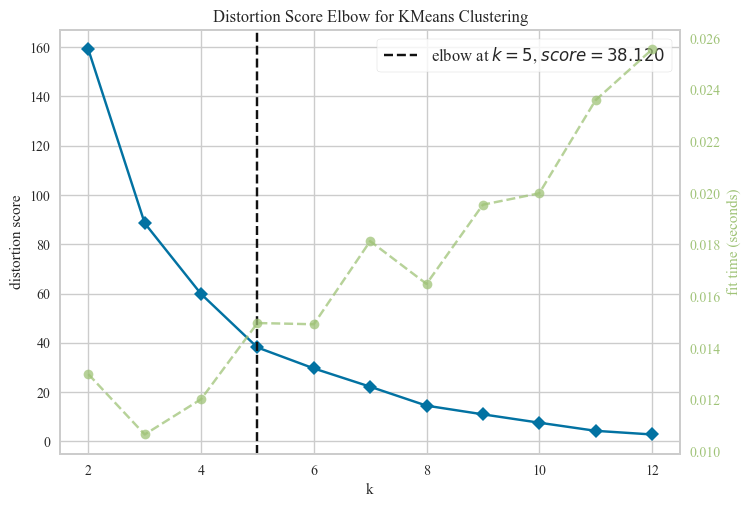

In [44]:
model = KElbowVisualizer(KMeans(random_state = 20222023), k=12)
model.fit(dataNew)
model.poof(outpath="figures\\高钾肘部法则.pdf")

In [45]:
n_clusters = 5
cluster = KMeans(n_clusters = n_clusters, random_state = 20222023).fit(dataNew)
y_pred = cluster.labels_
data['Class']=y_pred
data

D:\python\p\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),Class
0,0.04,6.32,0.87,3.93,1.74,4
1,0.04,2.01,0.04,4.06,0.04,0
2,0.04,5.87,1.11,5.50,2.16,4
3,0.04,7.12,1.56,6.44,2.06,4
4,0.04,7.35,1.77,7.50,2.62,4
5,0.04,0.04,1.98,11.15,2.39,2
6,0.04,5.41,1.73,10.05,6.04,3
7,0.04,1.07,0.04,1.98,0.17,0
8,0.04,0.62,0.04,1.32,0.32,0
9,0.04,0.21,0.04,0.81,0.26,0


In [46]:
# 输出5个类别数据
def ClassDataOutPut(i):
    data[data['Class']==i].to_excel(f'Class\\高钾Class {i}.xlsx',sheet_name='Class')


for i in range(5):
    ClassDataOutPut(i)